# **Heart Failure Prediction**

# 1. Importing Libraries

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

2. Load Data

In [5]:
data = pd.read_csv('/content/heart.csv')

3. Data Analysis

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.00,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.00,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.00,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.50,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.00,Up,0


In [7]:
data.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.20,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.40,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.20,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.00,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.00,Up,0


In [8]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.00,918.00,918.00,918.00,918.00,918.00,918.00
mean,53.51,132.40,198.80,0.23,136.81,0.89,0.55
std,9.43,18.51,109.38,0.42,25.46,1.07,0.50
min,28.00,0.00,0.00,0.00,60.00,-2.60,0.00
25%,47.00,120.00,173.25,0.00,120.00,0.00,0.00
50%,54.00,130.00,223.00,0.00,138.00,0.60,1.00
75%,60.00,140.00,267.00,0.00,156.00,1.50,1.00
max,77.00,200.00,603.00,1.00,202.00,6.20,1.00


In [9]:
data.shape

(918, 12)

In [10]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

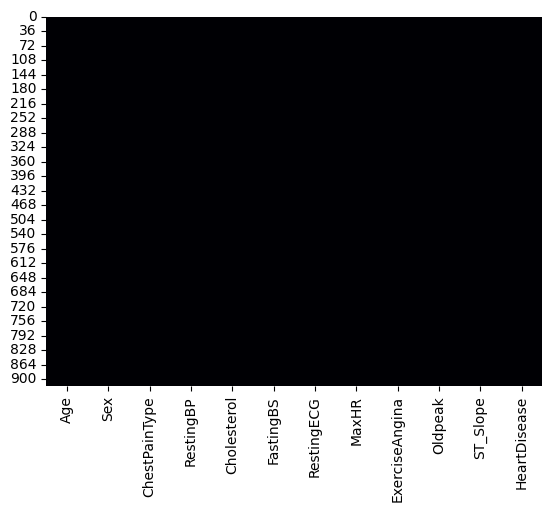

In [11]:
sns.heatmap(data.isnull(),cmap = 'magma',cbar = False);

In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.00,53.51,9.43,28.00,47.00,54.00,60.00,77.00
RestingBP,918.00,132.40,18.51,0.00,120.00,130.00,140.00,200.00
Cholesterol,918.00,198.80,109.38,0.00,173.25,223.00,267.00,603.00
FastingBS,918.00,0.23,0.42,0.00,0.00,0.00,0.00,1.00
MaxHR,918.00,136.81,25.46,60.00,120.00,138.00,156.00,202.00
Oldpeak,918.00,0.89,1.07,-2.60,0.00,0.60,1.50,6.20
HeartDisease,918.00,0.55,0.50,0.00,0.00,1.00,1.00,1.00


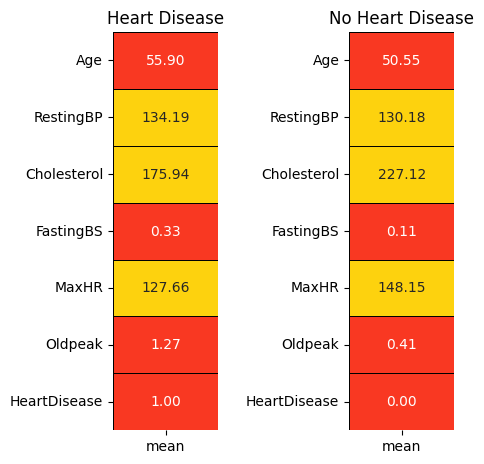

In [13]:
yes = data[data['HeartDisease'] == 1].describe().T
no = data[data['HeartDisease'] == 0].describe().T
colors = ['#F93822','#FDD20E']

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))
plt.subplot(1,2,1)
sns.heatmap(yes[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f',)
plt.title('Heart Disease');

plt.subplot(1,2,2)
sns.heatmap(no[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Heart Disease');

fig.tight_layout(pad = 2)

In [14]:
col = list(data.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(data[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : Sex ChestPainType FastingBS RestingECG ExerciseAngina ST_Slope HeartDisease
Numerical Features : Age RestingBP Cholesterol MaxHR Oldpeak


In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1 = data.copy(deep = True)

df1['Sex'] = le.fit_transform(df1['Sex'])
df1['ChestPainType'] = le.fit_transform(df1['ChestPainType'])
df1['RestingECG'] = le.fit_transform(df1['RestingECG'])
df1['ExerciseAngina'] = le.fit_transform(df1['ExerciseAngina'])
df1['ST_Slope'] = le.fit_transform(df1['ST_Slope'])

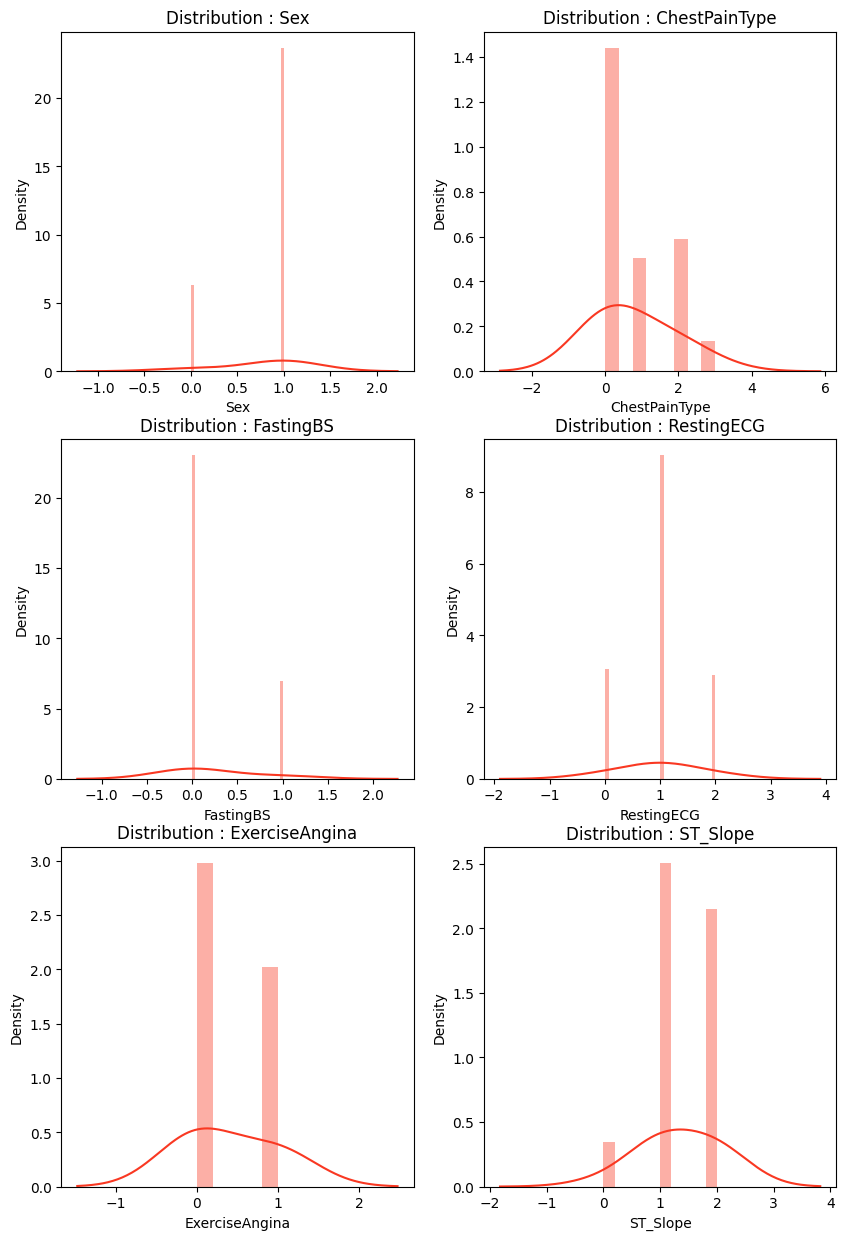

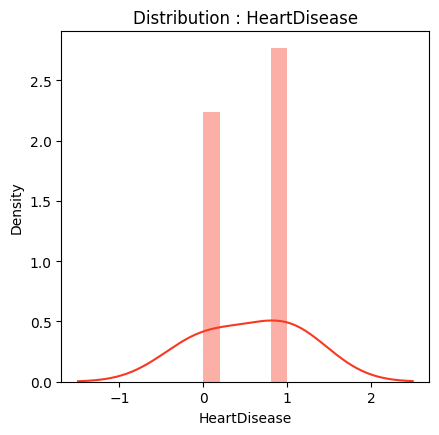

In [16]:
fig, ax = plt.subplots(nrows = 3,ncols = 2,figsize = (10,15))
for i in range(len(categorical_features) - 1):

    plt.subplot(3,2,i+1)
    sns.distplot(df1[categorical_features[i]],kde_kws = {'bw' : 1},color = colors[0]);
    title = 'Distribution : ' + categorical_features[i]
    plt.title(title)

plt.figure(figsize = (4.75,4.55))
sns.distplot(df1[categorical_features[len(categorical_features) - 1]],kde_kws = {'bw' : 1},color = colors[0])
title = 'Distribution : ' + categorical_features[len(categorical_features) - 1]
plt.title(title);

4. Data Visualisation

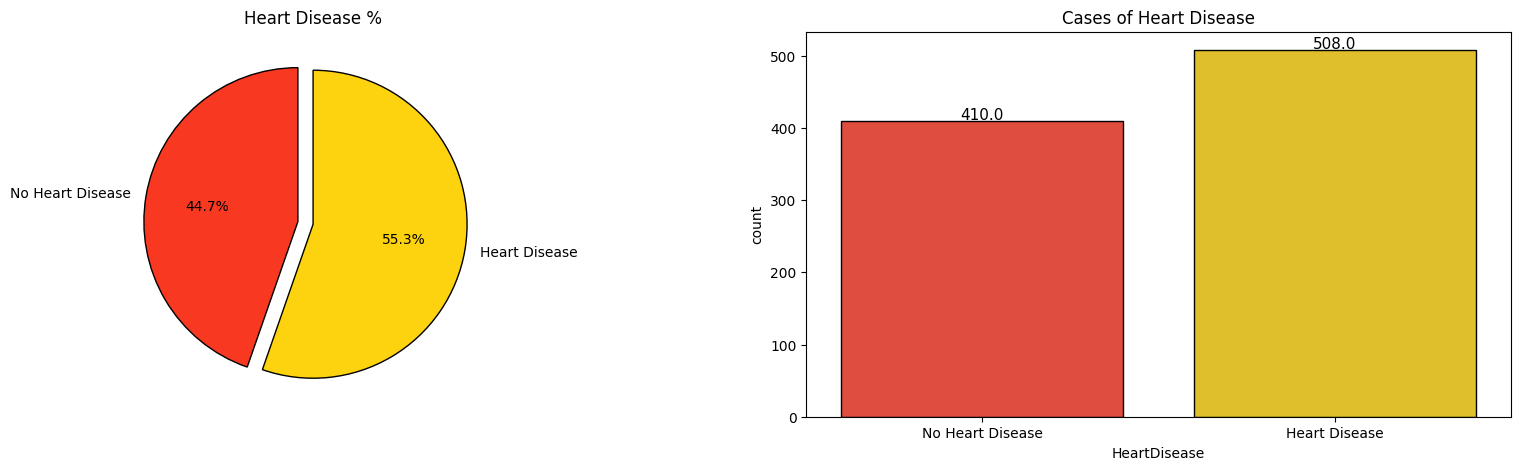

In [18]:
l = list(data['HeartDisease'].value_counts())
circle = [l[1] / sum(l) * 100,l[0] / sum(l) * 100]

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
plt.subplot(1,2,1)
plt.pie(circle,labels = ['No Heart Disease','Heart Disease'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Heart Disease %');

plt.subplot(1,2,2)
ax = sns.countplot(data=data, x='HeartDisease', palette=colors, edgecolor='black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['No Heart Disease','Heart Disease'])
plt.title('Cases of Heart Disease');
plt.show()

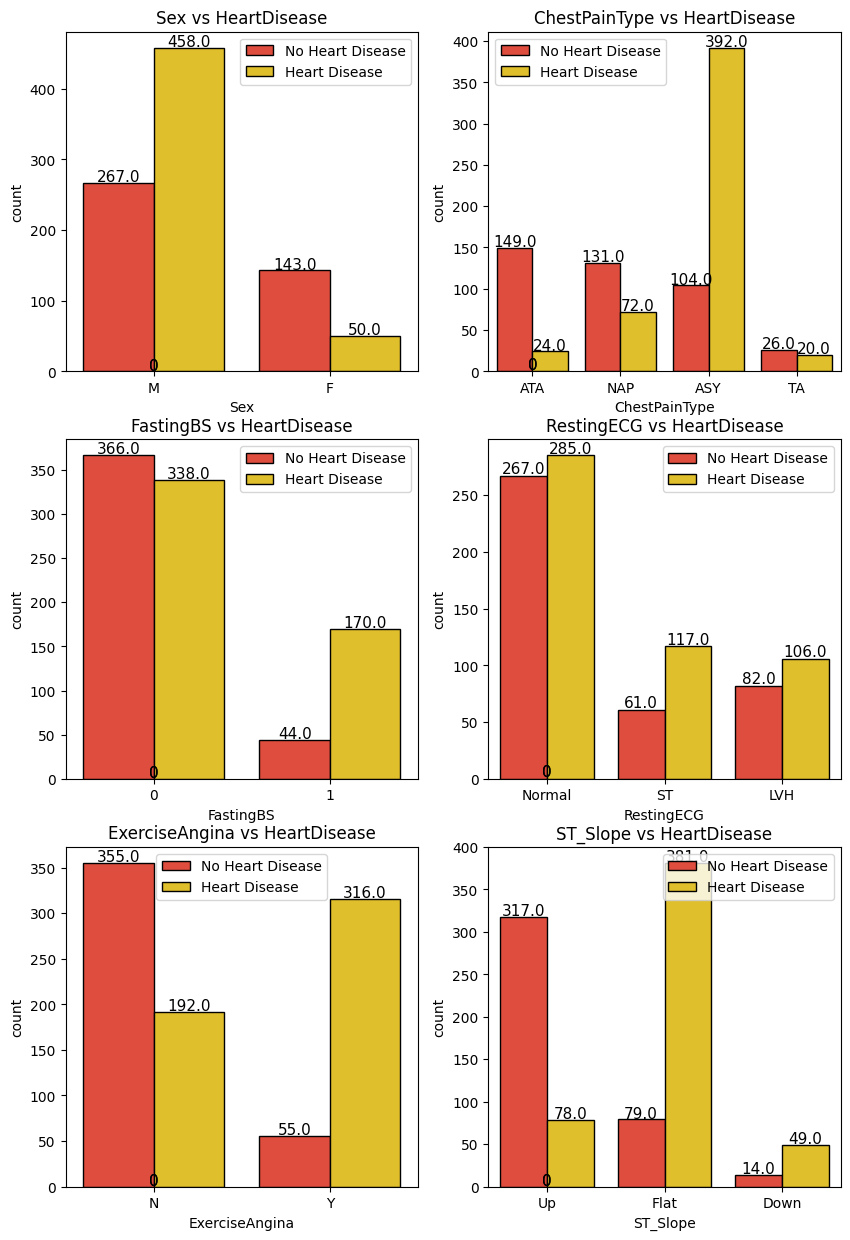

In [23]:
fig, ax = plt.subplots(nrows = 3,ncols = 2,figsize = (10,15))
for i in range(len(categorical_features) - 1):
    plt.subplot(3,2,i+1)
    ax = sns.countplot(x=categorical_features[i], hue="HeartDisease", palette=colors, edgecolor='black', data=data)
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    title = categorical_features[i] + ' vs HeartDisease'
    plt.legend(['No Heart Disease','Heart Disease'])
    plt.title(title);

In [24]:
sex = data[data['HeartDisease'] == 1]['Sex'].value_counts()
sex = [sex[0] / sum(sex) * 100, sex[1] / sum(sex) * 100]

cp = data[data['HeartDisease'] == 1]['ChestPainType'].value_counts()
cp = [cp[0] / sum(cp) * 100,cp[1] / sum(cp) * 100,cp[2] / sum(cp) * 100,cp[3] / sum(cp) * 100]

fbs = data[data['HeartDisease'] == 1]['FastingBS'].value_counts()
fbs = [fbs[0] / sum(fbs) * 100,fbs[1] / sum(fbs) * 100]

restecg = data[data['HeartDisease'] == 1]['RestingECG'].value_counts()
restecg = [restecg[0] / sum(restecg) * 100,restecg[1] / sum(restecg) * 100,restecg[2] / sum(restecg) * 100]

exang = data[data['HeartDisease'] == 1]['ExerciseAngina'].value_counts()
exang = [exang[0] / sum(exang) * 100,exang[1] / sum(exang) * 100]

slope = data[data['HeartDisease'] == 1]['ST_Slope'].value_counts()
slope = [slope[0] / sum(slope) * 100,slope[1] / sum(slope) * 100,slope[2] / sum(slope) * 100]

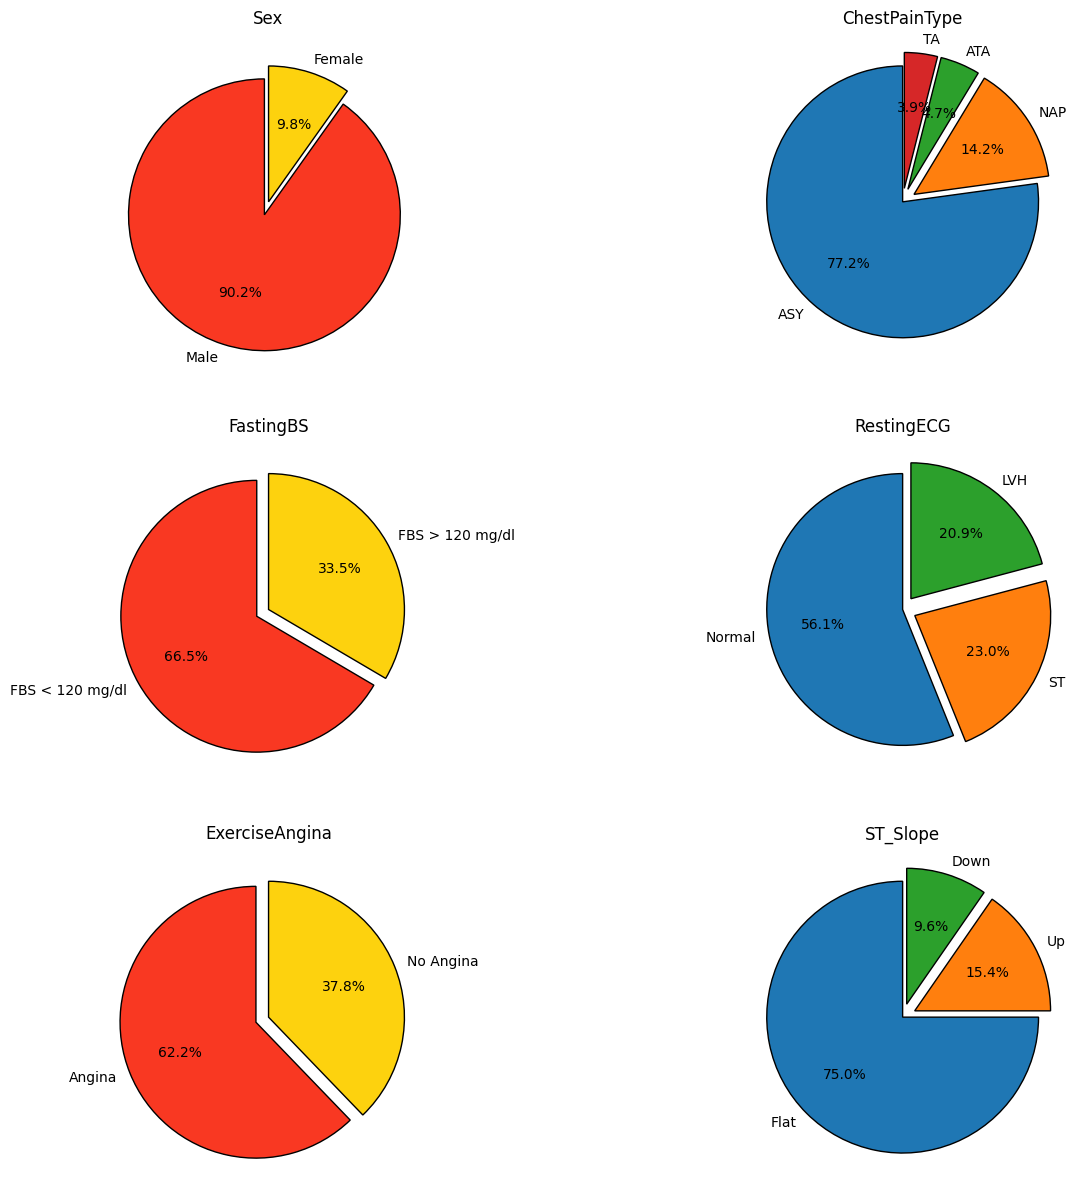

In [25]:
ax,fig = plt.subplots(nrows = 4,ncols = 2,figsize = (15,15))

plt.subplot(3,2,1)
plt.pie(sex,labels = ['Male','Female'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Sex');

plt.subplot(3,2,2)
plt.pie(cp,labels = ['ASY', 'NAP', 'ATA', 'TA'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1,0.1,0.1),
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('ChestPainType');

plt.subplot(3,2,3)
plt.pie(fbs,labels = ['FBS < 120 mg/dl','FBS > 120 mg/dl'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('FastingBS');

plt.subplot(3,2,4)
plt.pie(restecg,labels = ['Normal','ST','LVH'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1,0.1),
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('RestingECG');

plt.subplot(3,2,5)
plt.pie(exang,labels = ['Angina','No Angina'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('ExerciseAngina');

plt.subplot(3,2,6)
plt.pie(slope,labels = ['Flat','Up','Down'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1,0.1),
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('ST_Slope');

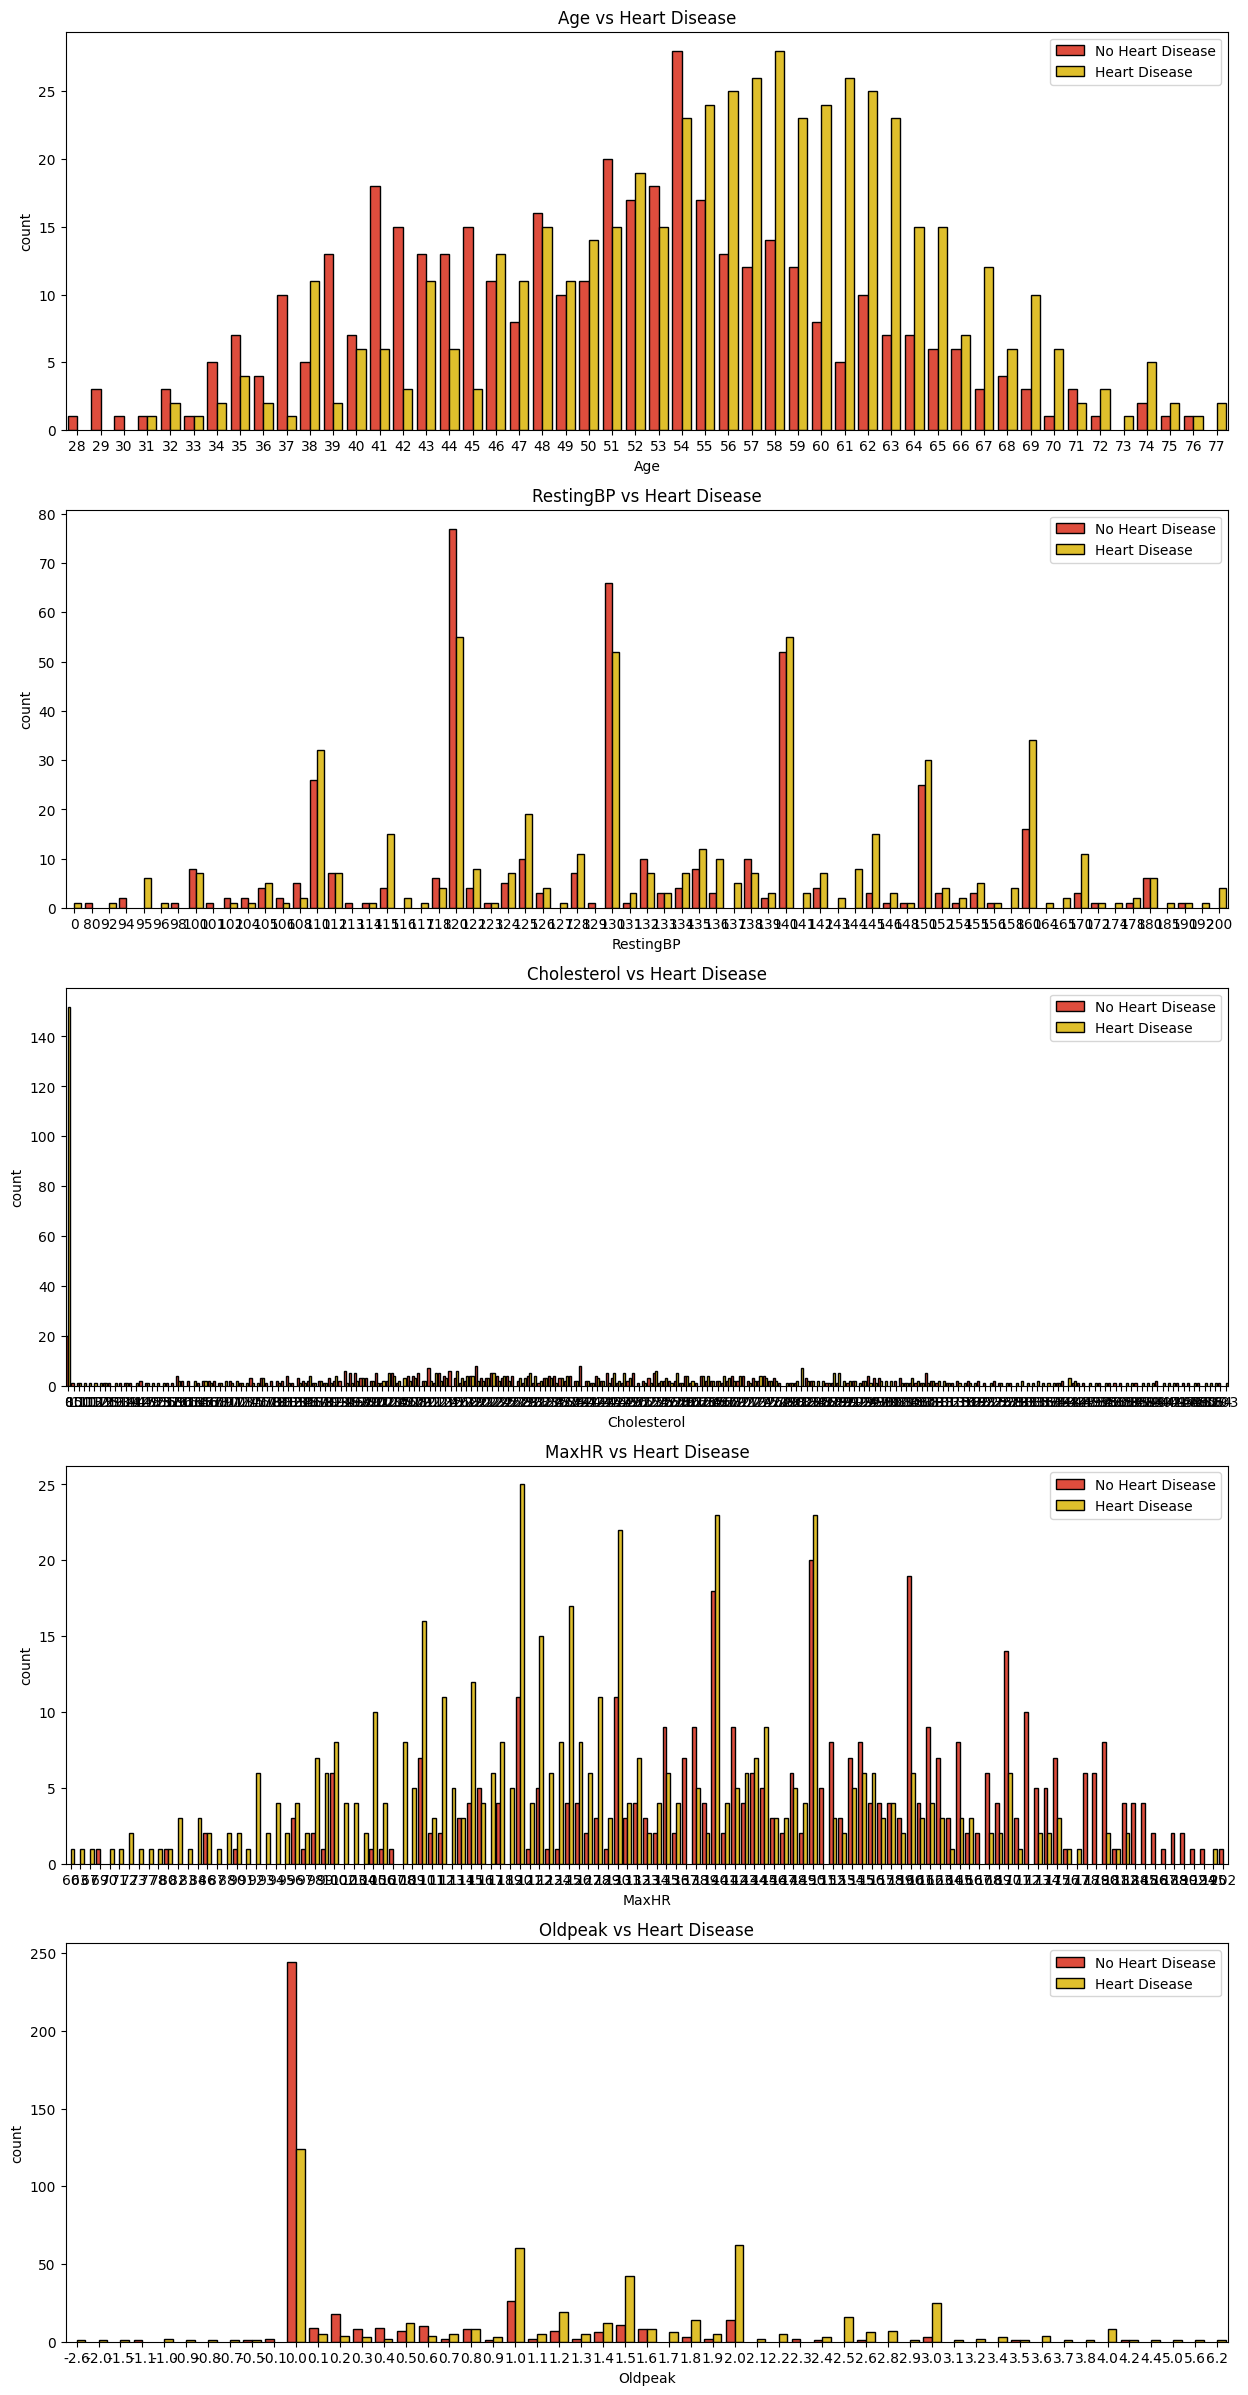

In [30]:
fig, ax = plt.subplots(nrows = 5,ncols = 1,figsize = (15,30))
for i in range(len(numerical_features)):
    plt.subplot(5,1,i+1)
    sns.countplot(data=data, x=numerical_features[i], hue="HeartDisease", palette=colors, edgecolor='black')
    title = numerical_features[i] + ' vs Heart Disease'
    plt.legend(['No Heart Disease','Heart Disease'])
    plt.title(title);

In [31]:
data['RestingBP_Group'] = [ int(i / 5) for i in data['RestingBP']]
data['Cholesterol_Group'] = [ int(i / 10) for i in data['Cholesterol']]
data['MaxHR_Group'] = [ int(i / 5) for i in data['MaxHR']]
data['Oldpeak_Group'] = [ int( (i*10) / 5) for i in data['Oldpeak']]

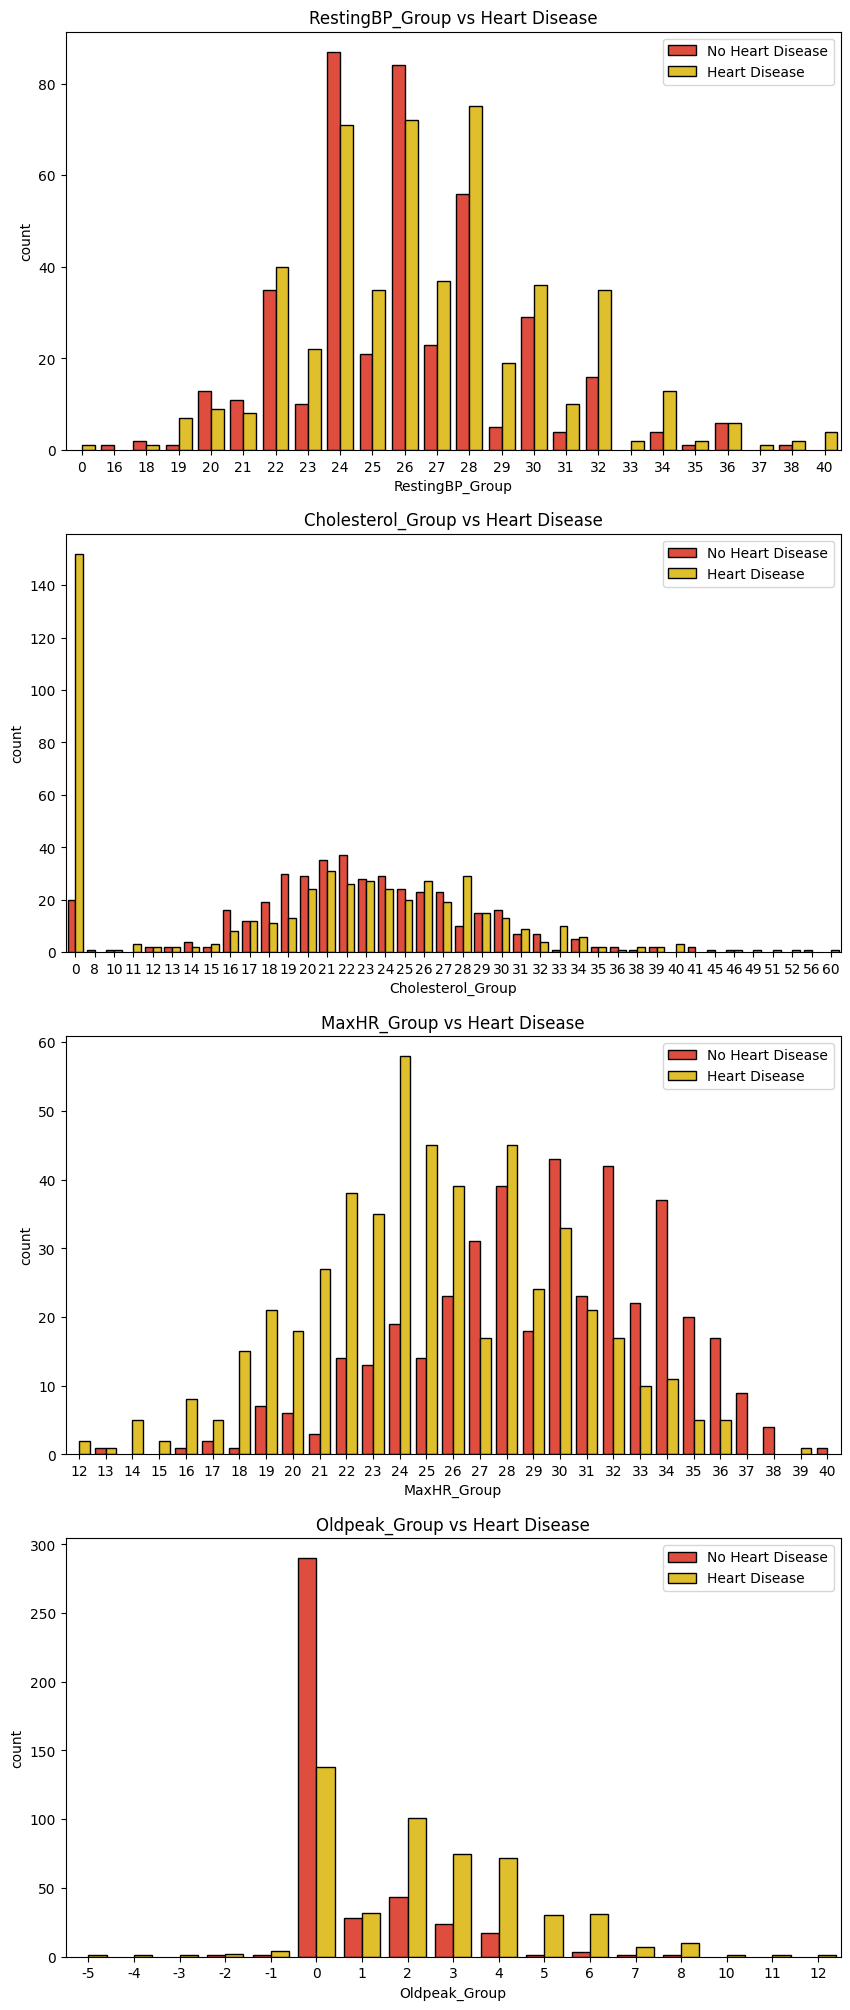

In [35]:
fig, ax = plt.subplots(nrows = 4,ncols = 1,figsize = (10,25))
group_numerical_features = [i + '_Group' for i in numerical_features[1:]]
for i in range(len(group_numerical_features)):
    plt.subplot(4,1,i+1)
    sns.countplot(data=data, x=group_numerical_features[i], hue="HeartDisease", palette=colors, edgecolor='black', ax=ax[i])
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = group_numerical_features[i] + ' vs Heart Disease'
    plt.title(title);

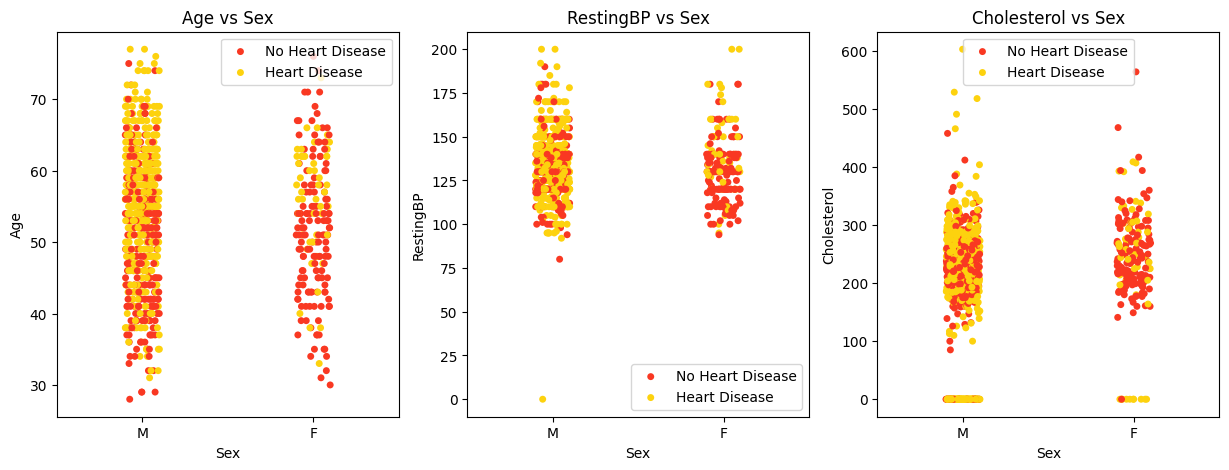

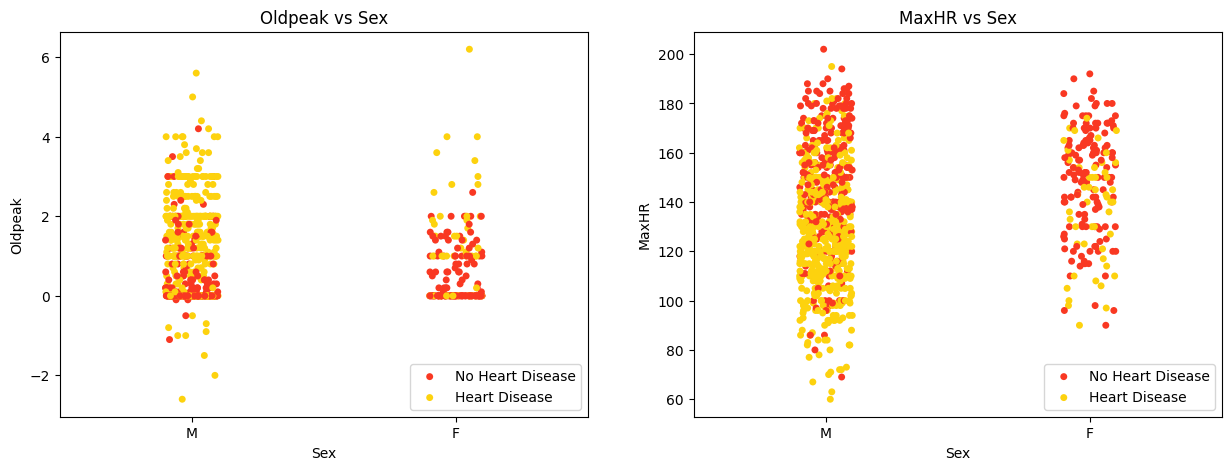

In [36]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'Sex',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs Sex'
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'Sex',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs Sex'
    plt.title(title);

# **Modeling**

In [ ]:
!pip install scikit-learn==1.0.2

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
data = pd.read_csv("/content/heart.csv")

df1 = data.copy(deep=True)

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1 = data.copy(deep = True)

df1['Sex'] = le.fit_transform(df1['Sex'])
df1['ChestPainType'] = le.fit_transform(df1['ChestPainType'])
df1['RestingECG'] = le.fit_transform(df1['RestingECG'])
df1['ExerciseAngina'] = le.fit_transform(df1['ExerciseAngina'])
df1['ST_Slope'] = le.fit_transform(df1['ST_Slope'])

In [16]:
features = df1[df1.columns.drop(['HeartDisease','RestingBP','RestingECG'])].values
target = df1['HeartDisease'].values
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state = 2)

In [28]:
def model(classifier):

    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Accuracy : ",'{0:.2%}'.format(accuracy_score(y_test,prediction)))
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))
    plot_roc_curve(classifier, x_test,y_test)
    plt.title('ROC_AUC_Plot')
    plt.show()

def model_evaluation(classifier):

    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    colors = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']
    sns.heatmap(cm,annot = labels,cmap = colors,fmt ='')

    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))

1) Logistic Regression :

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
classifier_lr = LogisticRegression(random_state = 0,C=10,penalty= 'l2')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Accuracy :  85.87%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross Validation Score :  91.05%
ROC_AUC Score :  85.78%


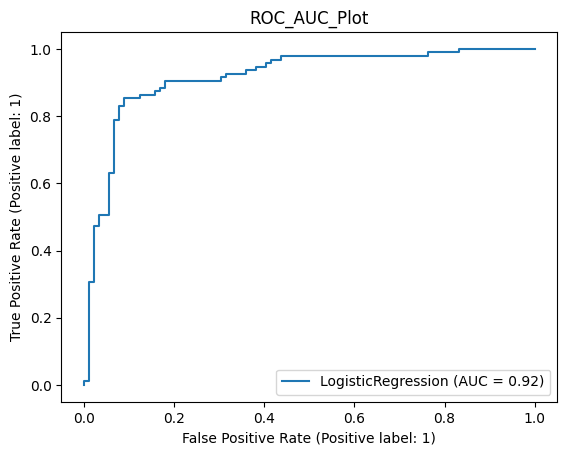

In [35]:
model(classifier_lr)

              precision    recall  f1-score   support

           0       0.87      0.83      0.85        89
           1       0.85      0.88      0.87        95

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



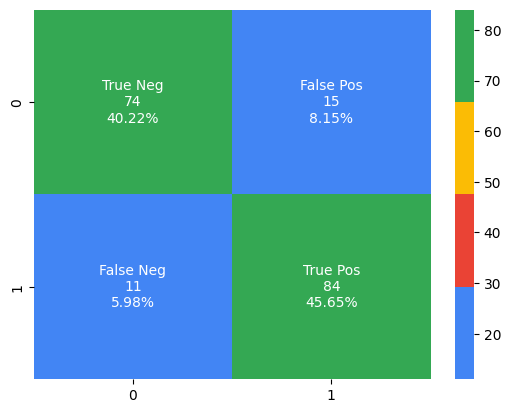

In [29]:
model_evaluation(classifier_lr)

2) Support Vector Classifier :

In [30]:
from sklearn.svm import SVC

In [32]:
classifier_svc = SVC(kernel = 'linear',C = 0.1)

Accuracy :  85.33%
Cross Validation Score :  90.72%
ROC_AUC Score :  85.29%


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


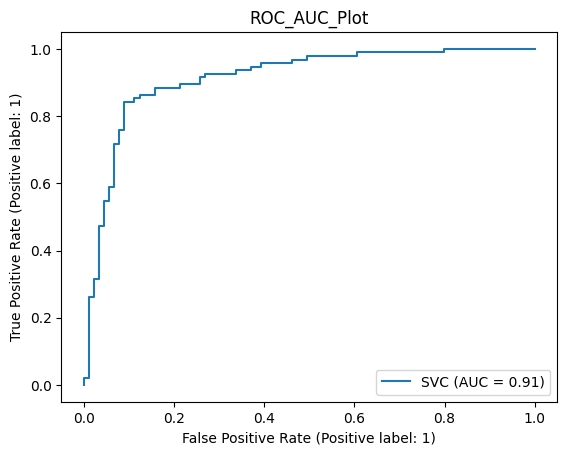

In [33]:
model(classifier_svc)

              precision    recall  f1-score   support

           0       0.85      0.84      0.85        89
           1       0.85      0.86      0.86        95

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



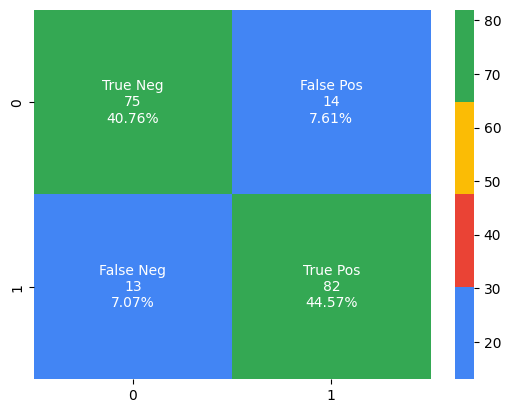

In [34]:
model_evaluation(classifier_svc)

3) Decision Tree Classifier :

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
classifier_dt = DecisionTreeClassifier(random_state = 1000,max_depth = 4,min_samples_leaf = 1)

Accuracy :  84.78%
Cross Validation Score :  89.09%
ROC_AUC Score :  84.62%


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


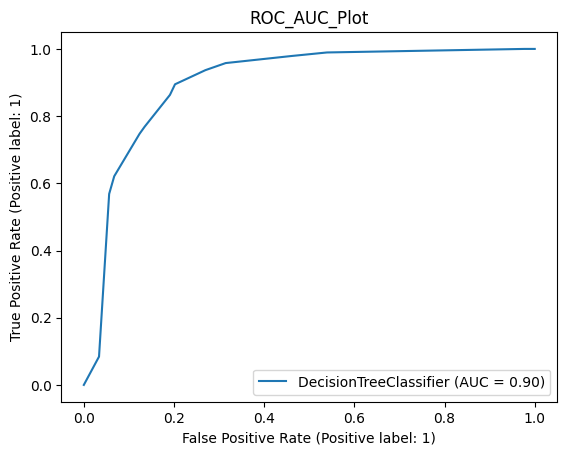

In [38]:
model(classifier_dt)

              precision    recall  f1-score   support

           0       0.88      0.80      0.84        89
           1       0.83      0.89      0.86        95

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



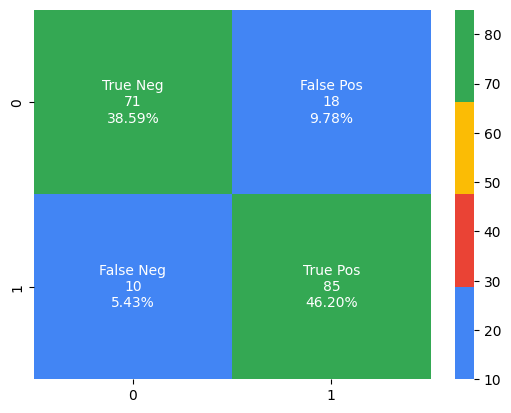

In [39]:
model_evaluation(classifier_dt)

4) Random Forest Classifier :

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
classifier_rf = RandomForestClassifier(max_depth = 4,random_state = 0)

Accuracy :  84.24%
Cross Validation Score :  92.91%
ROC_AUC Score :  84.06%


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


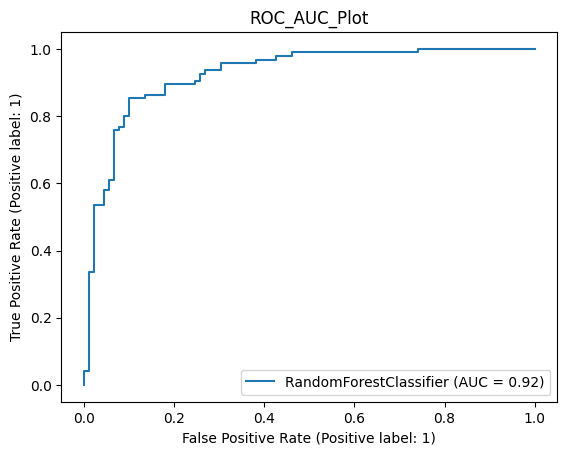

In [43]:
model(classifier_rf)

              precision    recall  f1-score   support

           0       0.88      0.79      0.83        89
           1       0.82      0.89      0.85        95

    accuracy                           0.84       184
   macro avg       0.85      0.84      0.84       184
weighted avg       0.85      0.84      0.84       184



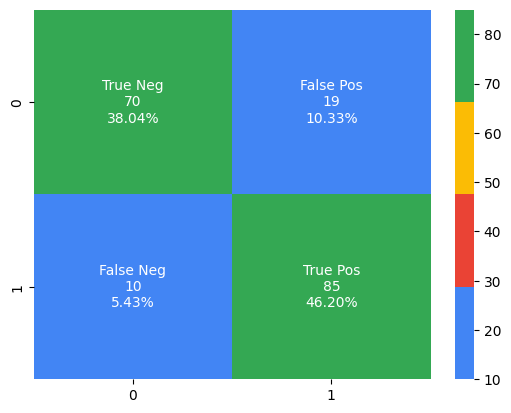

In [44]:
model_evaluation(classifier_rf)

5) K-nearest Neighbors Classifier :

In [45]:
from sklearn.neighbors import KNeighborsClassifier

In [46]:
classifier_knn = KNeighborsClassifier(leaf_size = 1, n_neighbors = 3,p = 1)

Accuracy :  73.37%
Cross Validation Score :  77.92%
ROC_AUC Score :  73.18%


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


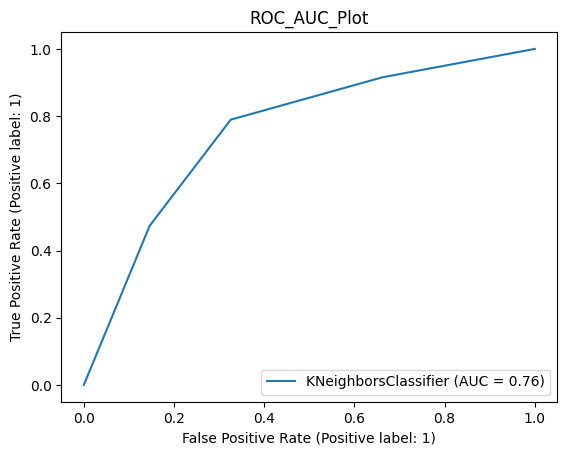

In [47]:
model(classifier_knn)

              precision    recall  f1-score   support

           0       0.75      0.67      0.71        89
           1       0.72      0.79      0.75        95

    accuracy                           0.73       184
   macro avg       0.74      0.73      0.73       184
weighted avg       0.74      0.73      0.73       184



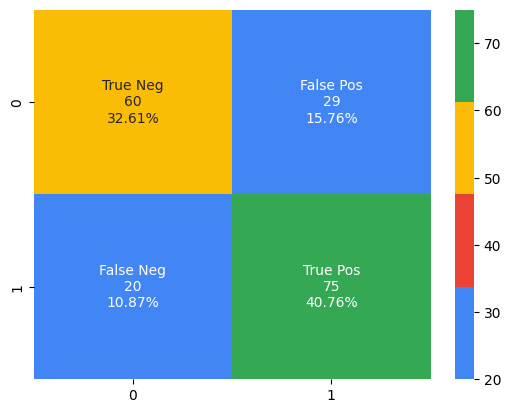

In [48]:
model_evaluation(classifier_knn)